<a href="https://colab.research.google.com/github/Ahhhextd/PROJECT_AHHHEXTD/blob/main/TUGAS_BESAR_DATA_ANALITIK_KELOMPOK_6_CLUSTERING_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
#MEMILIH LIBRARY YANG DIGUNAKAN.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

In [36]:
# *DATA SELECTION*
from google.colab import files
df = pd.read_csv('/content/age structure.csv')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 4 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Country                                      228 non-null    object
 1   % of population in Age group 0 to 14 years   228 non-null    object
 2   % of population in Age group 15 to 64 years  228 non-null    object
 3   % of population in Age group 65+ years       228 non-null    object
dtypes: object(4)
memory usage: 7.3+ KB
None


In [37]:
# *DATA CLEANING*
df.dtypes

,0
Country,object
% of population in Age group 0 to 14 years,object
% of population in Age group 15 to 64 years,object
% of population in Age group 65+ years,object


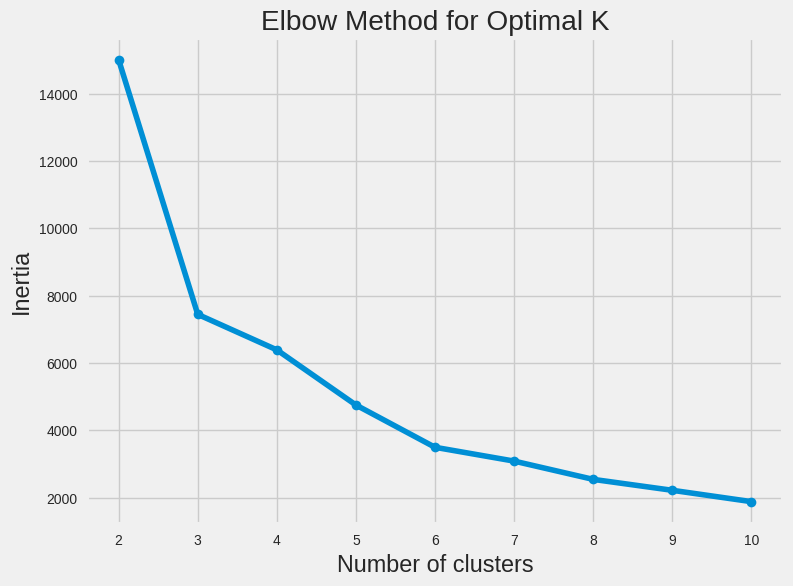

Silhouette Score for K=3: 0.5325617231880357


In [38]:
# *DATA PRE-PROCESSING*
df['% of population in Age group 0 to 14 years'] = df['% of population in Age group 0 to 14 years'].replace({'%': ''}, regex=True).astype(float)
df['% of population in Age group 15 to 64 years'] = df['% of population in Age group 15 to 64 years'].replace({'%': ''}, regex=True).astype(float)
df['% of population in Age group 65+ years'] = df['% of population in Age group 65+ years'].replace({'%': ''}, regex=True).astype(float)

X = df[['% of population in Age group 0 to 14 years',
          '% of population in Age group 15 to 64 years',
          '% of population in Age group 65+ years']]

inertia = []
range_n_clusters = range(2, 11)  # Testing from 2 to 10 clusters

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Silhouette Score for the best K (let's assume K=3 from the elbow method)
best_k = 3
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(X)
silhouette_avg = silhouette_score(X, kmeans.labels_)

print(f'Silhouette Score for K={best_k}: {silhouette_avg}')

In [39]:
print(df.head(11))

                Country  % of population in Age group 0 to 14 years  \
0           Afghanistan                                       39.80   
1               Albania                                       17.90   
2               Algeria                                       28.78   
3        American Samoa                                       25.91   
4               Andorra                                       12.31   
5                Angola                                       47.18   
6              Anguilla                                       21.00   
7   Antigua and Barbuda                                       21.97   
8             Argentina                                       18.51   
9               Armenia                                       17.98   
10  Aruba (Netherlands)                                       17.32   

    % of population in Age group 15 to 64 years  \
0                                         57.35   
1                                         67.

In [40]:
df.head (200)

,Country,% of population in Age group 0 to 14 years,% of population in Age group 15 to 64 years,% of population in Age group 65+ years
0,Afghanistan,39.80,57.35,2.85
1,Albania,17.90,67.53,14.57
2,Algeria,28.78,64.29,6.93
3,American Samoa,25.91,65.89,8.20
4,Andorra,12.31,68.17,19.52
...,...,...,...,...
195,Sweden,17.26,62.05,20.69
196,Switzerland,15.49,65.13,19.38
197,Syria,33.27,62.58,4.15
198,Taiwan,12.22,69.72,18.07


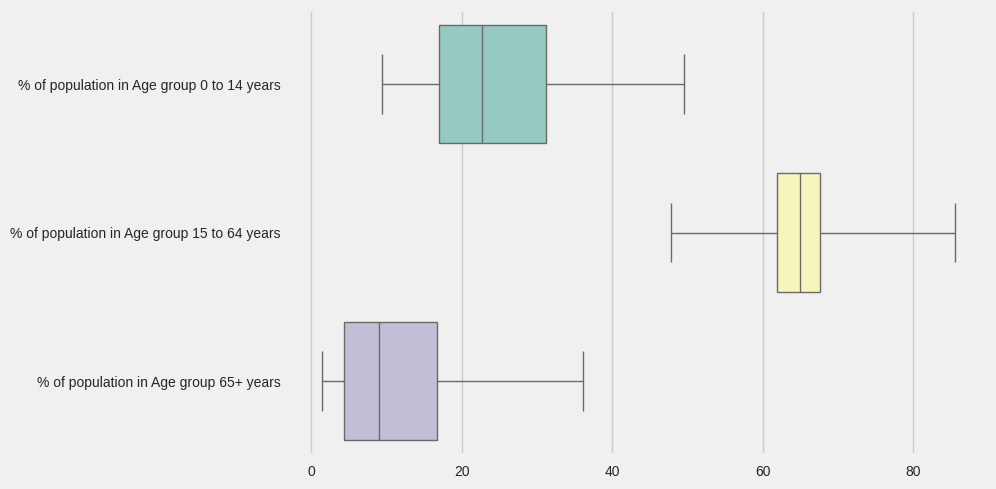

In [41]:
# *DATA ANALYSIS*
ax = sns.boxplot(data=df, orient="h", palette="Set3", showfliers=False, whis=float('inf'))

In [42]:
# *CLUSTERING K-MEANS*

from sklearn.preprocessing import StandardScaler
import pandas as pd

df_numeric_for_scaling = df.select_dtypes(include=['int64', 'float64'])
scaler = StandardScaler()
std_atr = scaler.fit_transform(df_numeric_for_scaling)
std_atr = pd.DataFrame(std_atr, columns=df_numeric_for_scaling.columns)
print(std_atr)

     % of population in Age group 0 to 14 years  \
0                                      1.559420   
1                                     -0.735667   
2                                      0.404541   
3                                      0.103769   
4                                     -1.321491   
..                                          ...   
223                                    0.958925   
224                                    1.071059   
225                                    1.841328   
226                                    1.387550   
227                                   -0.033517   

     % of population in Age group 15 to 64 years  \
0                                      -1.279687   
1                                       0.601916   
2                                       0.003056   
3                                       0.298790   
4                                       0.720210   
..                                           ...   
223                    

In [43]:
inertia_values = []
silhouette_values = []

In [44]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(std_atr)

    inertia_values.append(kmeans.inertia_)

    silhouette_avg = silhouette_score(std_atr, kmeans.labels_)
    silhouette_values.append(silhouette_avg)

In [45]:
print("Length of inertia_values:", len(inertia_values))
print("Length of silhouette_values:", len(silhouette_values))

Length of inertia_values: 9
Length of silhouette_values: 9


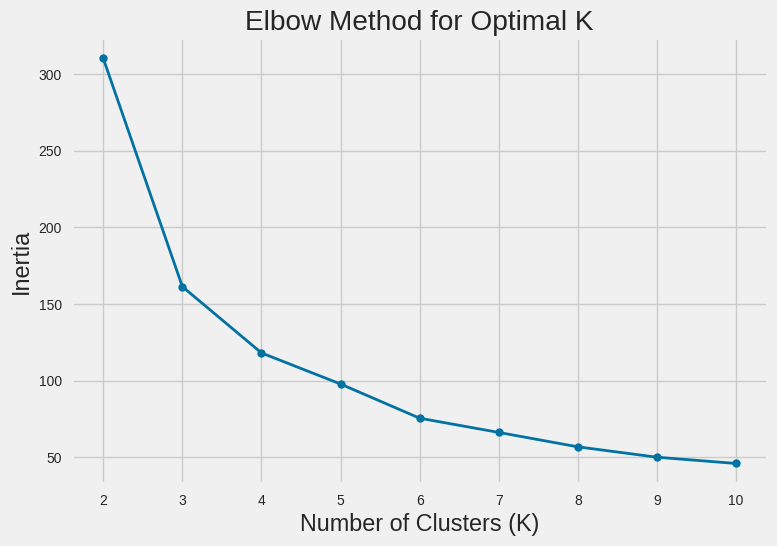

In [46]:
plt.plot(range(2, 11), inertia_values, marker='o', color='b', linestyle='-', linewidth=2, markersize=6)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

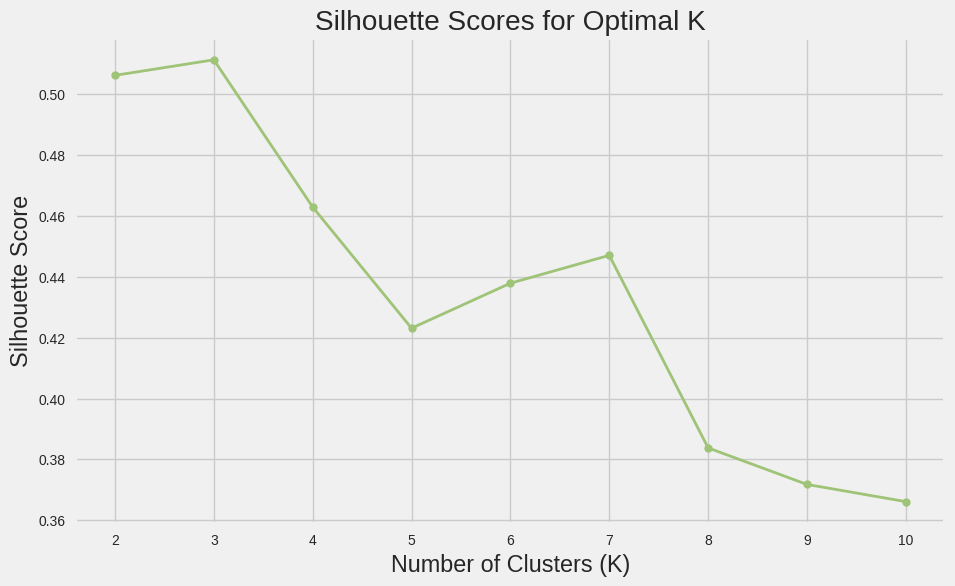

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_values, marker='o', color='g', linestyle='-', linewidth=2, markersize=6)
plt.title('Silhouette Scores for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

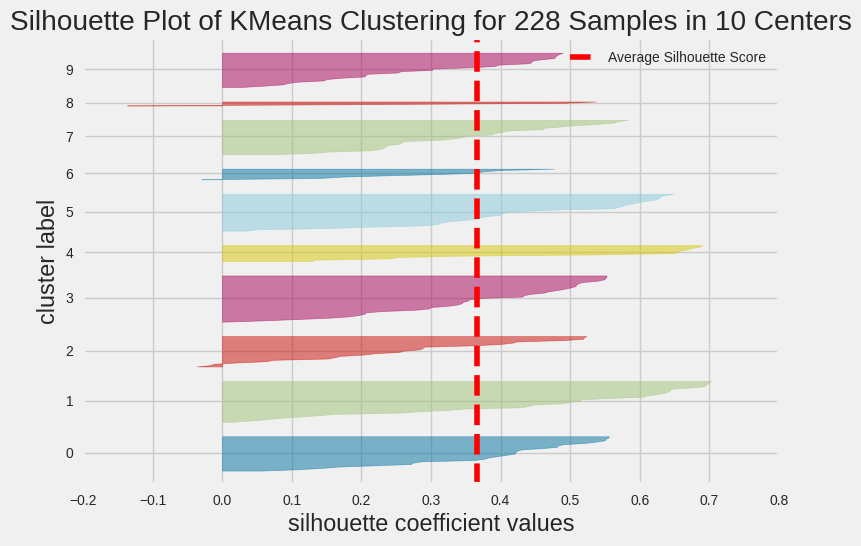

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 228 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [48]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(k, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(std_atr)
visualizer.show()

In [49]:
kmeans = KMeans(n_clusters=k, random_state=42)  # Number of clusters = 3 as per dataset characteristics
kmeans.fit(std_atr)
std_atr['Cluster_KMeans'] = kmeans.labels_


In [50]:
from sklearn.metrics import silhouette_score
km = KMeans(n_clusters=k, random_state=42)
km.fit(std_atr)
score = silhouette_score(std_atr, km.labels_)
print('Silhouette Score: %.3f' % score)


Silhouette Score: 0.753


In [51]:
inertia_values = []
silhouette_values = []

for k in range(2, 11):  # Menghitung untuk klaster antara 2 hingga 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(std_atr)

    # Menyimpan nilai inertia
    inertia_values.append(kmeans.inertia_)

    # Pastikan jumlah klaster lebih dari 1 untuk menghitung Silhouette Score
    if k > 1:
        silhouette_avg = silhouette_score(std_atr, kmeans.labels_)
        silhouette_values.append(silhouette_avg)

# Menampilkan panjang inertia_values dan silhouette_values untuk memverifikasi
print("Panjang inertia_values:", len(inertia_values))
print("Panjang silhouette_values:", len(silhouette_values))

Panjang inertia_values: 9
Panjang silhouette_values: 9


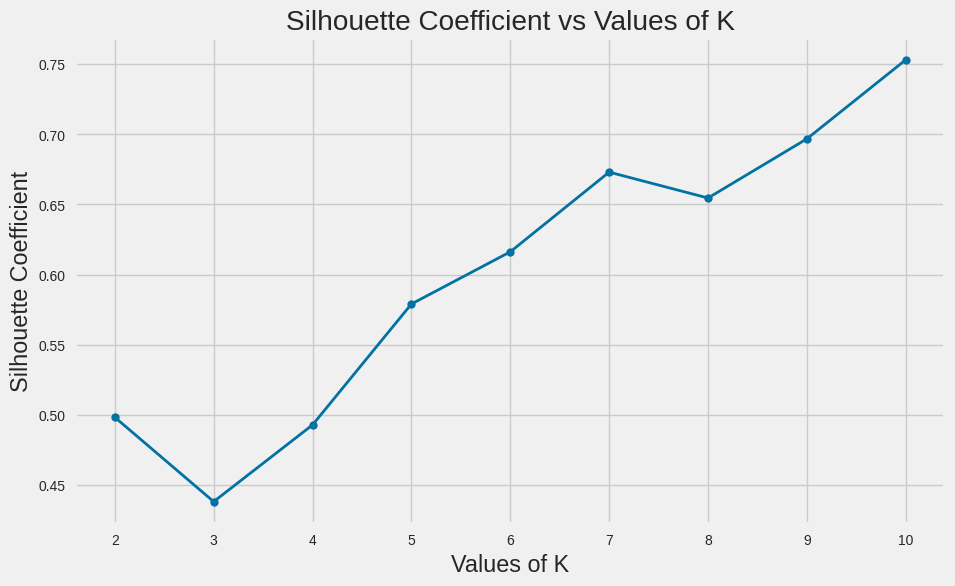

In [52]:
k_clusters = range(2, 11)  # Jumlah klaster dari 2 sampai 10

# Plot Silhouette Coefficients vs Values of K
plt.figure(figsize=(10, 6))
plt.plot(k_clusters, silhouette_values, marker='o', color='b', linestyle='-', linewidth=2, markersize=6)
plt.title('Silhouette Coefficient vs Values of K')
plt.xlabel('Values of K')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.show()

In [53]:
np.random.seed(42)
std_atr = np.random.rand(10, 100)

In [54]:
sil_coefficients = []
k_clusters = []

In [55]:
model=KMeans(init="random",n_clusters=9)
model.fit(std_atr)
print('intertia:', model.inertia_)
print('cluster_centroids:',model.cluster_centers_)

intertia: 6.527330662453147
cluster_centroids: [[0.10312387 0.90255291 0.50525237 0.82645747 0.3200496  0.89552323
  0.38920168 0.01083765 0.90538198 0.09128668 0.31931364 0.95006197
  0.95060715 0.57343789 0.63183721 0.44844552 0.29321077 0.32866455
  0.67251846 0.75237453 0.79157904 0.78961814 0.0912061  0.4944203
  0.05755876 0.54952888 0.4415305  0.88770418 0.35091501 0.11706702
  0.14299168 0.76151063 0.61821806 0.10112268 0.08410681 0.70096913
  0.07276301 0.82186006 0.70624223 0.08134878 0.08483771 0.98663958
  0.3742708  0.37064215 0.81279957 0.94724858 0.98600106 0.75337819
  0.37625959 0.08350072 0.77714692 0.55840425 0.42422201 0.90635439
  0.11119748 0.4926251  0.01135364 0.46866064 0.05630328 0.11881792
  0.11752625 0.6492103  0.74604488 0.58336877 0.96217255 0.37487058
  0.28571209 0.86859913 0.22359584 0.96322254 0.01215447 0.96987883
  0.04315991 0.89114311 0.52770111 0.9929648  0.07379656 0.55385428
  0.96930254 0.52309784 0.62939864 0.69574869 0.45454106 0.62755808
  

In [56]:
clt=model.labels_
hasil=pd.Series(clt,name="Cluster")
hasil=pd.DataFrame(hasil)
hasil

,Cluster
0,3
1,6
2,5
3,2
4,0
5,4
6,7
7,7
8,1
9,8


In [57]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA


In [58]:
data = pd.read_csv('/content/age structure.csv')
X = data.drop(columns=['Country'])
X = X.replace({'%': ''}, regex=True).astype(float)

preprocessor = Pipeline([('scaler', StandardScaler()),
                         ('pca', PCA(n_components=2, random_state=42))])

clusterer = Pipeline([('preprocessor', preprocessor),
                      ('clusterer', KMeans(n_clusters=6, init="k-means++", n_init=50, max_iter=500, random_state=42))])

# Fit the pipeline to the data
clusterer.fit(X)

# You can check the cluster centers
print("Cluster centers:", clusterer.named_steps['clusterer'].cluster_centers_)

Cluster centers: [[ 2.60364784 -0.5536844 ]
 [-0.23449951  0.786732  ]
 [-1.22487354  0.00535093]
 [ 1.09417161  0.32373614]
 [-1.42893695 -1.1858237 ]
 [-1.5295486   2.91671804]]


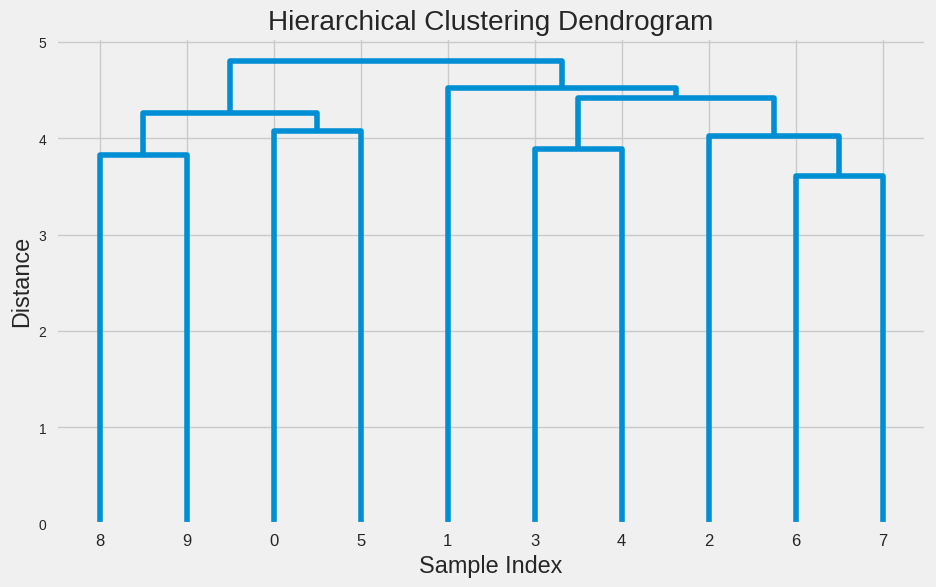

In [59]:
# *HIERARCHICAL CLUSTERING*
linked = linkage(std_atr, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()